In [274]:
import numpy as np
import pandas as pd

In [276]:
df = pd.read_csv("Job_Placement_Data.csv")
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [278]:
df.shape


(215, 13)

In [280]:
df.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [282]:
df.duplicated().sum()

0

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [286]:
df.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


2 EDA (Exploratory Data Analysis)

In [288]:
import matplotlib.pyplot as plt
import seaborn as sns

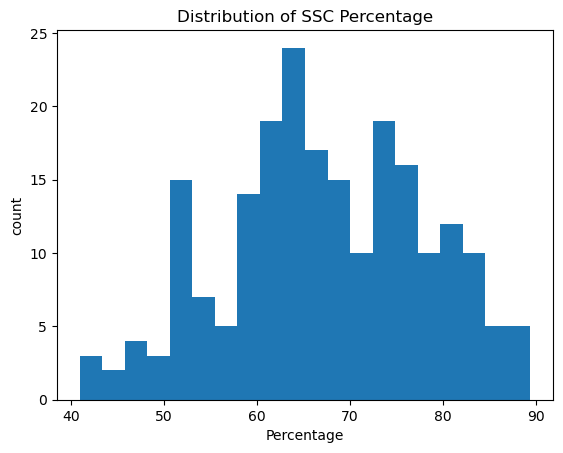

In [290]:
plt.hist(df['ssc_percentage'],bins=20)
plt.title("Distribution of SSC Percentage")
plt.xlabel('Percentage')
plt.ylabel('count')
plt.show()

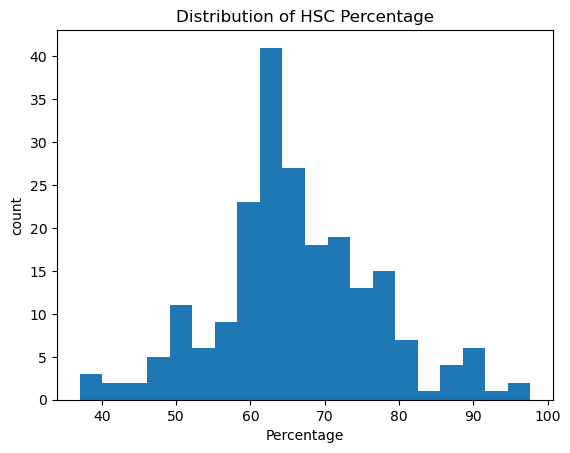

In [292]:
plt.hist(df['hsc_percentage'],bins=20)
plt.title("Distribution of HSC Percentage")
plt.xlabel('Percentage')
plt.ylabel('count')
plt.show()

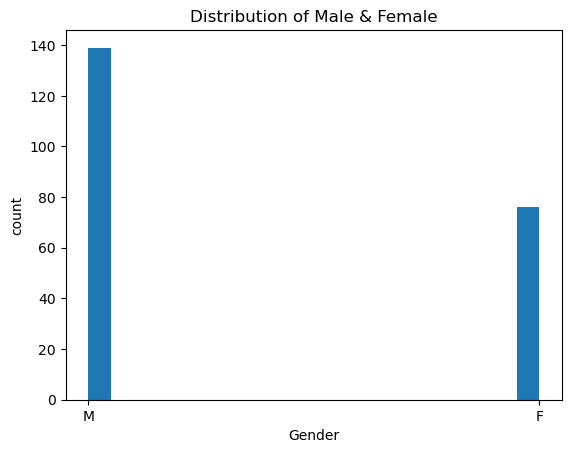

In [294]:
import matplotlib.pyplot as plt
plt.hist(df['gender'],bins=20)
plt.title("Distribution of Male & Female")
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

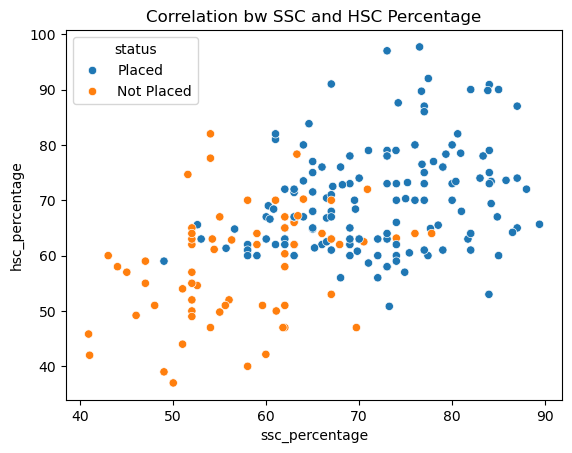

In [296]:
sns.scatterplot(x='ssc_percentage',y='hsc_percentage',data=df,hue='status')
plt.title("Correlation bw SSC and HSC Percentage")
plt.show()

In [298]:
df['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

# convert catrgorical variables into numerical


In [300]:
df = pd.get_dummies(df,columns=['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree', 'work_experience', 'specialisation', 'status'],drop_first=True)

In [302]:
df.dtypes


ssc_percentage               float64
hsc_percentage               float64
degree_percentage            float64
emp_test_percentage          float64
mba_percent                  float64
gender_M                        bool
ssc_board_Others                bool
hsc_board_Others                bool
hsc_subject_Commerce            bool
hsc_subject_Science             bool
undergrad_degree_Others         bool
undergrad_degree_Sci&Tech       bool
work_experience_Yes             bool
specialisation_Mkt&HR           bool
status_Placed                   bool
dtype: object

In [304]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# Now print head
df

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,gender_M,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,0,0,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,0,1,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,0,0,0,1,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,1,1,1,1,0,0,0,0,0,1
211,58.00,60.00,72.00,74.0,53.62,1,1,1,0,1,0,1,0,0,1
212,67.00,67.00,73.00,59.0,69.72,1,1,1,1,0,0,0,1,0,1
213,74.00,66.00,58.00,70.0,60.23,0,1,1,1,0,0,0,0,1,1


# train test split


In [332]:
x = df.drop('status_Placed',axis=1)
y = df['status_Placed']
print(x.shape,'\n\n',y.shape)

(215, 14) 

 (215,)


In [362]:
from sklearn.model_selection import train_test_split

In [366]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [368]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
# lg = LogisticRegression()
# lg.fit(X_train,y_train)
# y_pred = lg.predict(X_test)

In [370]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

svm = svm.SVC()
svm.fit(X_train,y_train)

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [372]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = knn.predict(X_test)
y_pred4 = dt.predict(X_test)

In [374]:
score1=accuracy_score(y_test,y_pred1)
score2=accuracy_score(y_test,y_pred2)
score3=accuracy_score(y_test,y_pred3)
score4=accuracy_score(y_test,y_pred4)

In [378]:
print(score1,score2,score3,score4)

0.8837209302325582 0.7674418604651163 0.7906976744186046 0.8372093023255814


In [382]:
print("\nClassification Report:\n", classification_report(y_test, y_pred1))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43



In [388]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT'],
            'ACC':[score1*100,
                  score2*100,
                  score3*100,
                  score4*100]})

In [390]:

final_data

,Models,ACC
0,LR,88.372093
1,SVC,76.744186
2,KNN,79.069767
3,DT,83.720930


In [394]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

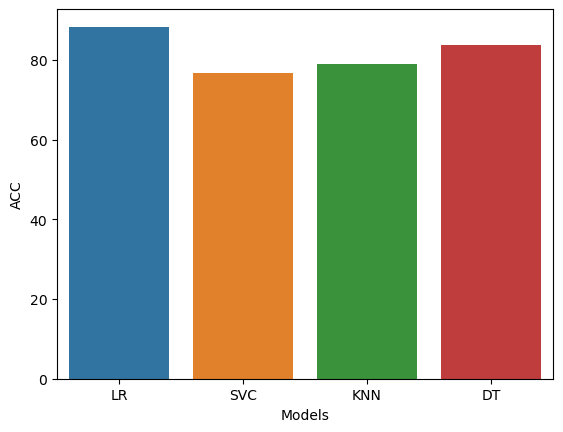

In [406]:
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
sns.barplot(x='Models', y='ACC', data=final_data, palette=custom_palette)
# plt.show()

In [416]:
input_data = (58.00,60.00,72.00,74.0,53.62,1,1,1,0,1,0,1,0,0)
np_df = np.asarray(input_data)
reshaped_df = np_df.reshape(1,-1)
pred = lg.predict(reshaped_df)
if pred[0] == 1:
    print("this person is placed for the job")
else:
    print("this person is not placed for the job")

this person is placed for the job


In [412]:
df


,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,gender_M,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,0,0,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,0,1,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,0,0,0,1,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,1,1,1,1,0,0,0,0,0,1
211,58.00,60.00,72.00,74.0,53.62,1,1,1,0,1,0,1,0,0,1
212,67.00,67.00,73.00,59.0,69.72,1,1,1,1,0,0,0,1,0,1
213,74.00,66.00,58.00,70.0,60.23,0,1,1,1,0,0,0,0,1,1
